In [1]:
import os
from deshaw.futures import constants
cur_dir = os.getcwd()
if cur_dir.split('/')[-1] == "paper":
    os.chdir('./..')

In [53]:
import numpy as np
import random
from matplotlib               import pyplot as plt
from matplotlib.pyplot        import figure, legend
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import lib.monotonic          as monotonic
import lib.diversity          as diversity
import lib.mc_density         as mc_density
import lib.mc_interior        as mc_interior
import lib.constants          as constants
import lib.temperature        as temperature
import lib.profile            as profile

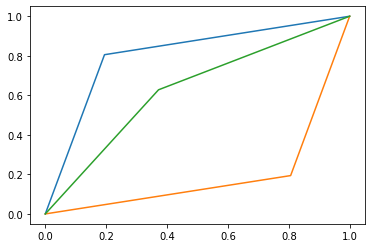

In [3]:
random.seed(97)
shells = diversity.create_shells(100)
plt.plot(*diversity.diagonal_method(shells))
plt.plot(*diversity.diagonal_method(shells))
plt.plot(*diversity.diagonal_method(shells))

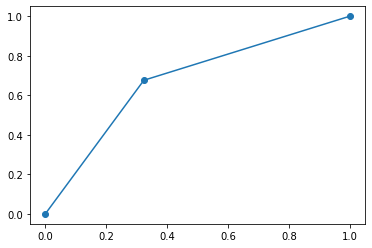

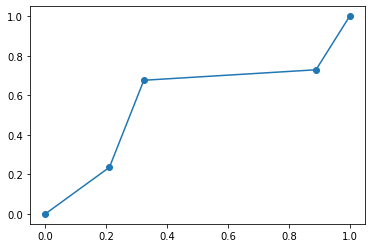

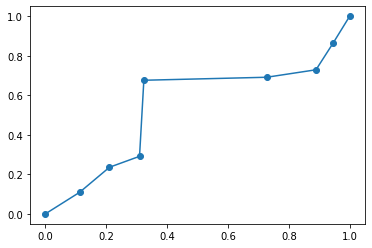

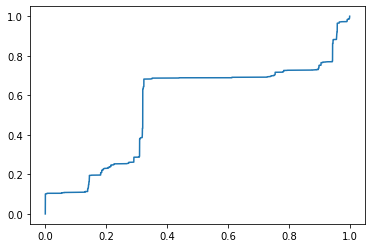

In [4]:
seed = 7

for i in [0,1,2]:
    random.seed(seed)
    plt.plot(*diversity.diagonal_method(shells,i), marker='o')
    plt.figure()
random.seed(seed)
plt.plot(*diversity.diagonal_method(shells,9))

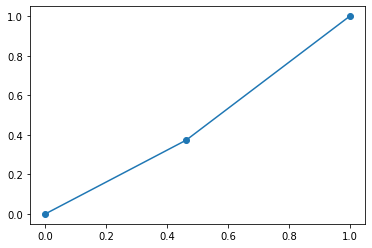

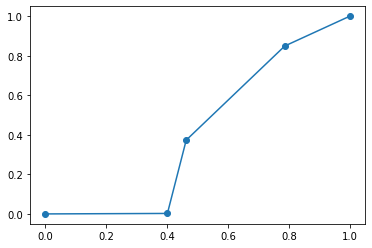

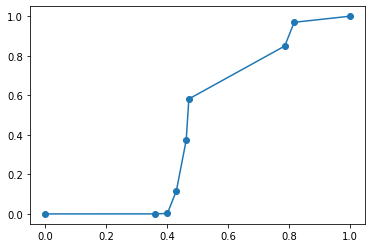

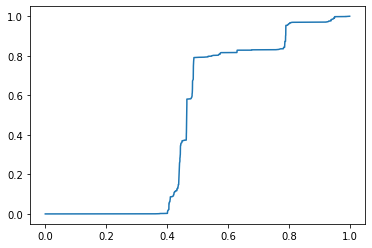

In [5]:
seed = 9

for i in [0,1,2]:
    random.seed(seed)
    plt.plot(*diversity.point_method(shells,i), marker='o')
    plt.figure()
random.seed(seed)
plt.plot(*diversity.point_method(shells,9))

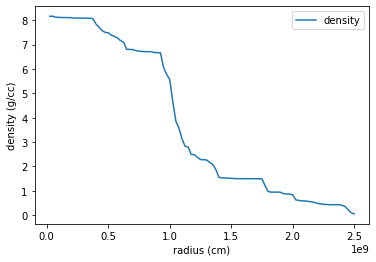

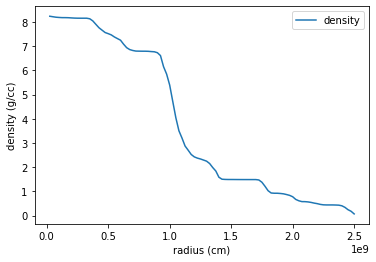

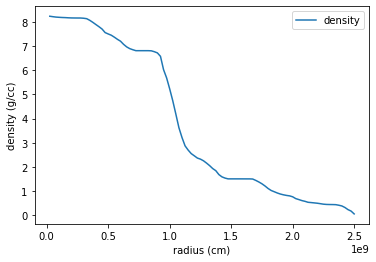

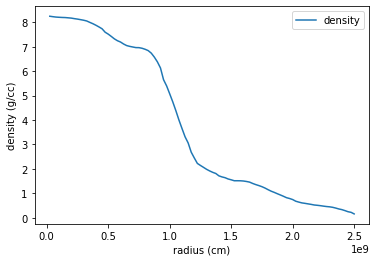

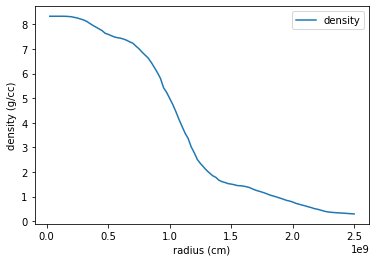

In [44]:
# Set for Uranus
mass = constants.URANUS.mass
moment_ratio=constants.URANUS.moment_ratio
radius = constants.URANUS.radius
num_shells = 100
rock_0 = 1.0  # This is the rock percent in the innermost shell.
env_0 = 1.0 # This is the env percent in the outmost shell.

#k=13
#k=127
#k=111
k=5526

random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=0.0)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=51)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=101)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=201)
mcdensity.plot_densities()
figure()
random.seed(k)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=301)
mcdensity.plot_densities()


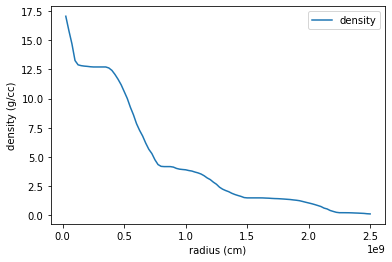

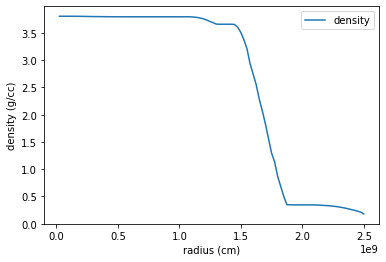

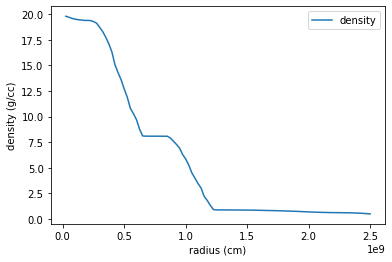

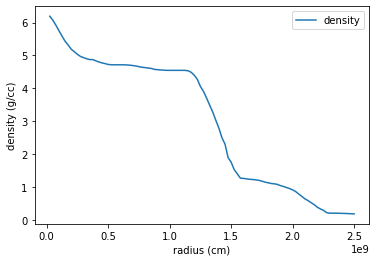

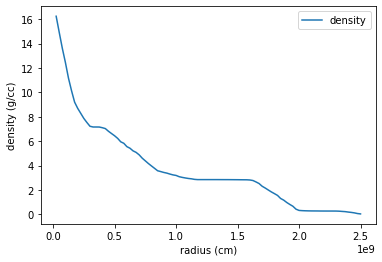

In [51]:


random.seed(1000)
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=201)
mcdensity.plot_densities()
figure()
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=201)
mcdensity.plot_densities()
figure()
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=201)
mcdensity.plot_densities()
figure()
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=201)
mcdensity.plot_densities()
figure()
mcdensity = mc_density.create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells, smooth=201)
mcdensity.plot_densities()



In [55]:
seed =  0.809819175
# Create a bunch of random models.
catalog = temperature.iron_sio2_water_env_catalog()

seed, i_m, inner_temp, i_count = profile.get_fixed_temp_model(mass, moment_ratio, radius, num_shells, 
                                                              max_temp=0,
                                                              seed=seed,
                                                              temperature_catalog=catalog,
                                                              full_model=True,
                                                              smooth=201,
                                                              inverse=True)

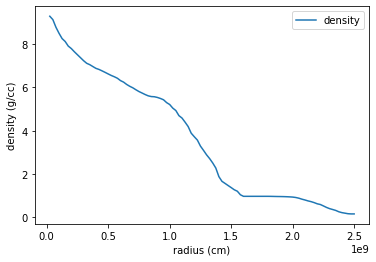

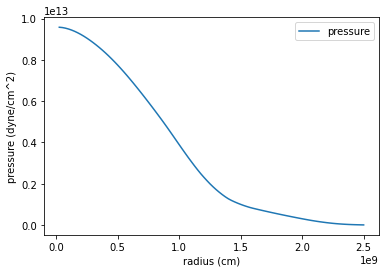

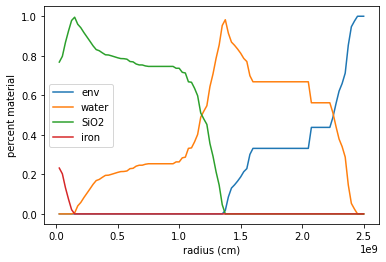

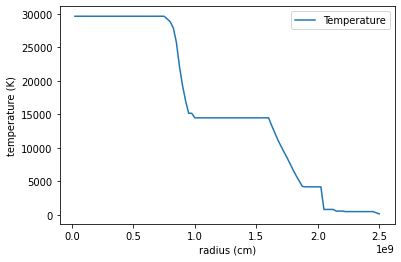

In [60]:
i_m.plot_densities()
plt.figure()
i_m.plot_pressure()
plt.figure()
i_m.plot_mix()
plt.figure()
i_m.plot_temp()



In [62]:
seed, f_m, inner_temp, f_count = profile.get_fixed_temp_model(mass, moment_ratio, radius, num_shells, 
                                                              max_temp=50000,
                                                              seed=seed,
                                                              temperature_catalog=catalog,
                                                              full_model=True,
                                                              smooth=201,
                                                              inverse=False)
      

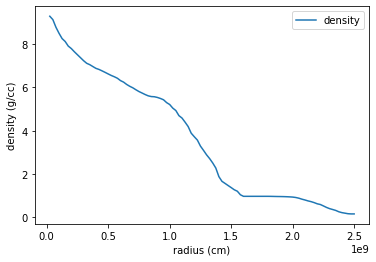

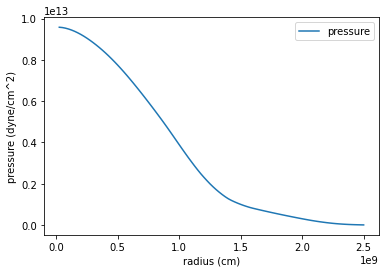

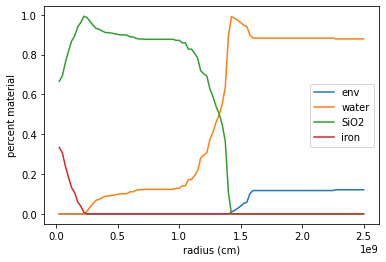

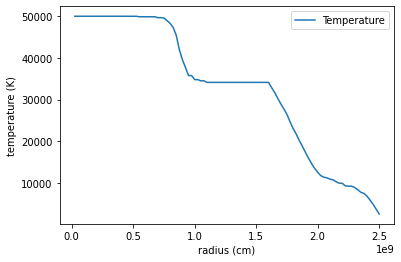

In [63]:
f_m.plot_densities()
plt.figure()
f_m.plot_pressure()
plt.figure()
f_m.plot_mix()
plt.figure()
f_m.plot_temp()

In [64]:
# Now do the both_ends model
cf = f_m.get_composition()
ci = i_m.get_composition()
cc = [x if abs(x) > abs(y) else y for (x,y) in zip(cf,ci)]
mix = []
for comp in cc:
    mix.append(catalog.composition_to_mix(comp))

both =  mc_interior.MCInterior(f_m.get_radii(), f_m.get_densities(),mix, catalog)

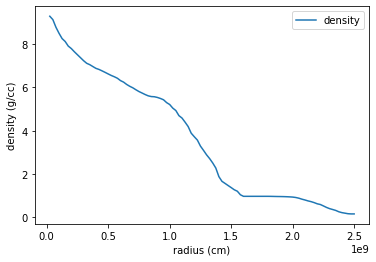

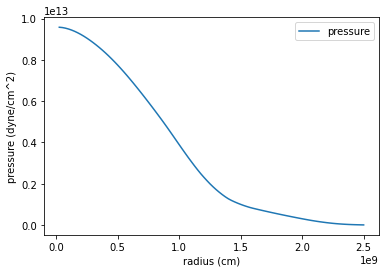

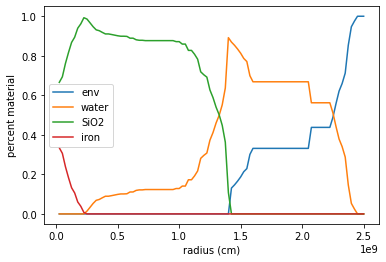

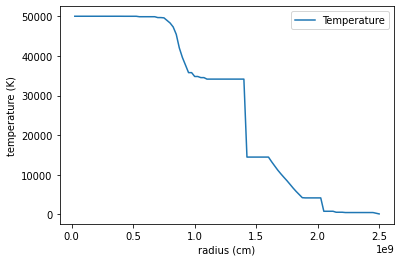

In [65]:
both.plot_densities()
plt.figure()
both.plot_pressure()
plt.figure()
both.plot_mix()
plt.figure()
both.plot_temp()

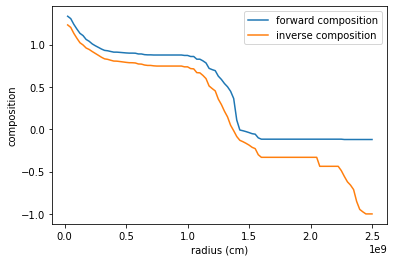

In [67]:
f_m.plot_composition("forward composition")
i_m.plot_composition("inverse composition")


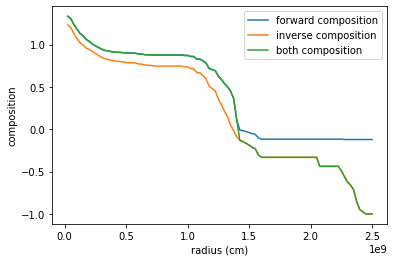

In [68]:
f_m.plot_composition("forward composition")
i_m.plot_composition("inverse composition")
both.plot_composition("both composition")